In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
df = pd.read_csv('f150_motor_distributors.txt', header=None, names=['Timing Speed', 'Coil Gaps'])

--2023-03-01 03:59:51--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.09s   

2023-03-01 03:59:52 (2.64 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



# Question 1

In [3]:
# define kmeans function
def kmeans(data, init):
  # calculate R
  p = np.array([[10, 0.5],[-10, 0.25]]).astype('float64')
  pTp_inv = np.linalg.inv(p.T.dot(p))
  # distance from each points to centroids
  dist = np.zeros([5000,5])
  # iteration 100 times
  for k in range(100):
    # five classes
    cls = np.zeros([5, 2])
    cls_num = np.zeros(5)
    # calculate distance
    for i in range(len(data)):
      for j in range(len(init)):
        dist[i][j] = np.linalg.norm(data[i]-init[j])
    # find minimum distance
    idx = np.argmin(dist,axis=1)
    # calculate new centroids
    for i in range(len(data)):
      cls[idx[i]] += data[i]
      cls_num[idx[i]] += 1
    for i in range(5):
      init[i] = cls[i]/cls_num[i]
  return init

In [4]:
# run kmeans on dataset with initial value "init"
init = np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]]).astype('float64')
data = df.to_numpy()
# res is new sets of centroid calculated by kmeans
res = kmeans(data, init)

In [5]:
# classify all data to a class of centroids
dist = np.zeros([5000,5])
p = np.array([[10, 0.5],[-10,0.25]])
pTp_inv = np.linalg.inv(np.dot(p.T, p))
for i in range(len(data)):
  for j in range(len(res)):
    dist[i][j] = np.linalg.norm(data[i]-res[j])

# class of each datapoint, ranging from 0 to 4
idx = np.argmin(dist,axis=1)

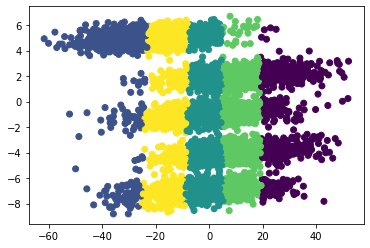

In [6]:
# scatter plot of classfication
plt.scatter(data[:,0], data[:,1], c=idx)

# Quetion 2

In [3]:
# Mahalanobis distance version of kmeans
def kmeans_M(data, init):
  # calculate R
  p = np.array([[10, 0.5],[-10, 0.25]]).astype('float64')
  pTp_inv = np.linalg.inv(p.T.dot(p))
  # distance from each points to centroids
  dist = np.zeros([5000,5])
  # iteration 100 times
  for k in range(100):
    # five classes
    cls = np.zeros([5, 2])
    cls_num = np.zeros(5)
    # calculate distance
    for i in range(len(data)):
      for j in range(len(init)):
        x1, y1 = data[i]
        x = np.array([[x1], [y1]])
        x2, y2 = init[j]
        y = np.array([[x2],[y2]])
        dist[i][j] = np.dot(np.dot((x-y).T, pTp_inv),(x-y))
    # find minimum distance
    idx = np.argmin(dist,axis=1)
    # calculate new centroids
    for i in range(len(data)):
      cls[idx[i]] += data[i]
      cls_num[idx[i]] += 1
    for i in range(5):
      init[i] = cls[i]/cls_num[i]
  return init

In [4]:
# run new version of kmeans
init = np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]]).astype('float64')
data = df.to_numpy()
cls_res = kmeans_M(data, init)

In [21]:
# classify all data to each cluster based on Mahalanobis distance
dist = np.zeros([5000,5])
p = np.array([[10, 0.5],[-10,0.25]])
pTp_inv = np.linalg.inv(np.dot(p.T, p))
for i in range(len(data)):
  for j in range(len(cls_res)):
    x1, y1 = data[i]
    x = np.array([[x1], [y1]])
    x2, y2 = cls_res[j]
    y = np.array([[x2],[y2]])
    dist[i][j] = np.dot(np.dot((x-y).T, pTp_inv),(x-y))

idx = np.argmin(dist,axis=1)

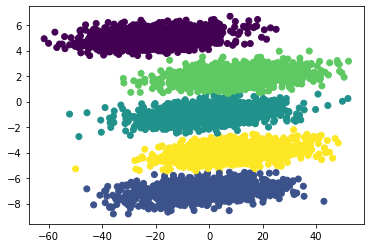

In [22]:
plt.scatter(data[:,0], data[:,1], c=idx)

In [23]:
from sklearn.decomposition import PCA

In [24]:
# set pca to 2 components
pca = PCA(n_components=2)

In [25]:
# aggregate
pca_all = pca.fit(df)
e = pca_all.components_
m = pca_all.mean_
print("Principle Components:", pca_all.components_)

Principle Components: [[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]


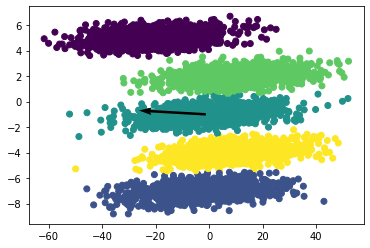

In [26]:
plt.scatter(data[:,0], data[:,1], c=idx)
plt.quiver(pca_all.mean_[0], pca_all.mean_[1], pca_all.components_[0][0], pca_all.components_[0][1], scale = 5)
plt.show()

In [27]:
# class 1
cls1 = data[idx==[0]]
pca1 = pca.fit(cls1)
e1 = pca1.components_
m1 = pca1.mean_
print("Principle Components:", e1)

Principle Components: [[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]


In [28]:
# class 2
cls2 = data[idx==[1]]
pca2 = pca.fit(cls2)
e2 = pca2.components_
m2 = pca2.mean_
print("Principle Components:", e2)

Principle Components: [[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]


In [29]:
# class 3
cls3 = data[idx==[2]]
pca3 = pca.fit(cls3)
e3 = pca3.components_
m3 = pca3.mean_
print("Principle Components:", e3)

Principle Components: [[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]


In [30]:
# class 4
cls4 = data[idx==[3]]
pca4 = pca.fit(cls4)
e4 = pca4.components_
m4 = pca4.mean_
print("Principle Components:", e4)

Principle Components: [[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]


In [31]:
# class 5
cls5 = data[idx==[4]]
pca5 = pca.fit(cls5)
e5 = pca5.components_
m5 = pca5.mean_
print("Principle Components:", e5)

Principle Components: [[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]


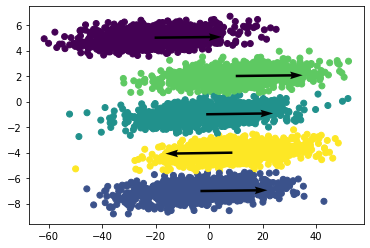

In [32]:
# graph is used for presentation in class
plt.scatter(data[:,0], data[:,1], c=idx)
plt.quiver(m1[0], m1[1], e1[0][0], e1[0][1], scale = 5)
plt.quiver(m2[0], m2[1], e2[0][0], e2[0][1], scale = 5)
plt.quiver(m3[0], m3[1], e3[0][0], e3[0][1], scale = 5)
plt.quiver(m4[0], m4[1], e4[0][0], e4[0][1], scale = 5)
plt.quiver(m5[0], m5[1], e5[0][0], e5[0][1], scale = 5)
plt.show()

In [33]:
# find eigen decomposition of correlation matrix
p = np.array([[10, 0.5],[-10,0.25]])
c = np.linalg.inv(np.dot(p.T, p))
eval, evec = np.linalg.eig(c)

In [34]:
# eigenvalue
eval

array([0.00499922, 3.55611189])

In [35]:
# diagnal matrix
lam = np.array([[eval[0],0],[0,eval[1]]])

In [36]:
# eigenvector
evec

array([[-0.99992166,  0.01251662],
       [-0.01251662, -0.99992166]])

In [37]:
# find p_prime
p_prime = lam @ evec

In [38]:
p_prime

array([[-4.99882615e-03,  6.25733069e-05],
       [-4.45104996e-02, -3.55583332e+00]])

In [39]:
# below is used for presentation in class
init = np.array([[10,10],[-10,-10],[2,2],[3,3],[-3,-3]]).astype('float64')
init_ref = init@p_prime

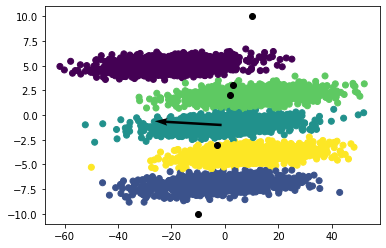

In [40]:
plt.scatter(data[:,0], data[:,1], c=idx)
plt.scatter(init[:,0], init[:,1], color="black")
plt.quiver(m[0], m[1], e[0][0], e[0][1], scale = 5)
plt.show()

In [41]:
data_ref = data@p_prime
m = m@p_prime
e = e@p_prime

In [42]:
e

array([[ 2.46066699e-03, -2.02184037e-01],
       [ 4.47226783e-02,  3.55008060e+00]])

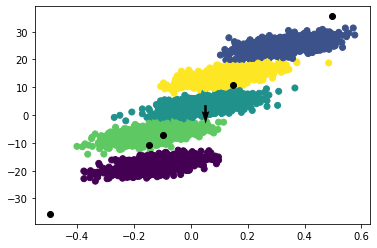

In [43]:
plt.scatter(data_ref[:,0], data_ref[:,1], c=idx)
plt.scatter(init_ref[:,0], init_ref[:,1], color="black")
plt.quiver(m[0], m[1], e[0][0], e[0][1])
plt.show()

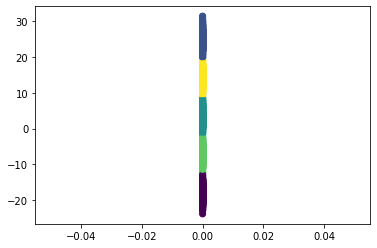

In [50]:
plt.scatter([0]*5000, data_ref[:,1], c=idx)